# **Night time light (NTL) and population**

Importing the most commonly used libraries and packages 

In [0]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler


# importing packages for visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


Importing source data through a downloadable link 

In [0]:
from pandas import read_excel
#The file is fetched from the below mentioned url
url = "https://drive.google.com/uc?export=download&id=1T5WGzsDKTmOqmBiDj0sJY2_5gsHBvDXw "
dataset = pd.read_excel(url, header=0)


# **EDA**

Let's walk through the data to see if we can get more infomration about the data

In [0]:
print(dataset.head()) #Top 5 rows in the dataset

  Month    Q0    Q1  Q2pt5    Q5   Q10   Q25   Q50   Q75   Q90    Q95  \
0   JUL  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.000   
1   JUL  0.02  0.08   0.09  0.11  0.13  0.18  0.30  0.72  1.89  4.110   
2   JUL  0.10  0.15   0.16  0.18  0.20  0.23  0.30  0.46  0.82  1.363   
3   JUL -0.04  0.03   0.04  0.05  0.07  0.12  0.21  0.47  0.92  1.500   
4   JUL  0.00  0.00   0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.000   

     Q97pt5      Q99        Q100     STNAME         CTYNAME  POPESTIMATE2015  
0   0.00000   0.0000    0.000000   Maryland        Allegany            72498  
1  10.37625  18.9790   95.500000    Alabama         Russell            58847  
2   3.11650   7.0808   42.669998    Georgia      Meriwether            21186  
3   2.93425   8.3137  203.500000  Louisiana  Cameron Parish             6815  
4   0.00000   0.0000    0.000000       Iowa          Clarke             9227  


In [0]:
#Descriptive statistics
dataset.describe()  

,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100,POPESTIMATE2015
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2.500000e+03
mean,-0.002188,0.038799,0.053699,0.070809,0.097120,0.174372,0.351830,0.783197,1.777998,2.982530,4.716755,8.087240,39.663584,1.058292e+05
std,0.141941,0.171293,0.230851,0.304831,0.425011,0.825364,1.685318,3.355028,6.304048,8.998663,12.084223,17.355886,98.100495,3.532298e+05
min,-0.580000,-0.280000,-0.180000,-0.120000,-0.070000,-0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.800000e+01
25%,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.088100e+04
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.165000,0.585000,2.575600e+04
75%,0.000000,0.030000,0.050000,0.070000,0.090000,0.140000,0.230000,0.420000,0.860000,1.583250,3.291500,8.595625,50.370000,7.043000e+04
max,2.610000,2.773600,6.000000,7.636000,10.530000,17.709999,32.000000,50.889999,74.743997,97.989998,122.191002,191.830002,2209.040039,1.012325e+07


In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 17 columns):
Month              2500 non-null object
Q0                 2500 non-null float64
Q1                 2500 non-null float64
Q2pt5              2500 non-null float64
Q5                 2500 non-null float64
Q10                2500 non-null float64
Q25                2500 non-null float64
Q50                2500 non-null float64
Q75                2500 non-null float64
Q90                2500 non-null float64
Q95                2500 non-null float64
Q97pt5             2500 non-null float64
Q99                2500 non-null float64
Q100               2500 non-null float64
STNAME             2500 non-null object
CTYNAME            2500 non-null object
POPESTIMATE2015    2500 non-null int64
dtypes: float64(13), int64(1), object(3)
memory usage: 332.1+ KB


In [0]:
dataset.shape

(2500, 17)

In [0]:
dataset.dtypes

Month               object
Q0                 float64
Q1                 float64
Q2pt5              float64
Q5                 float64
Q10                float64
Q25                float64
Q50                float64
Q75                float64
Q90                float64
Q95                float64
Q97pt5             float64
Q99                float64
Q100               float64
STNAME              object
CTYNAME             object
POPESTIMATE2015      int64
dtype: object

Identifying top 30 highly populated cities

As we can see from the below chart, Los Angeles has the highest population compared to all other cities in the U.S

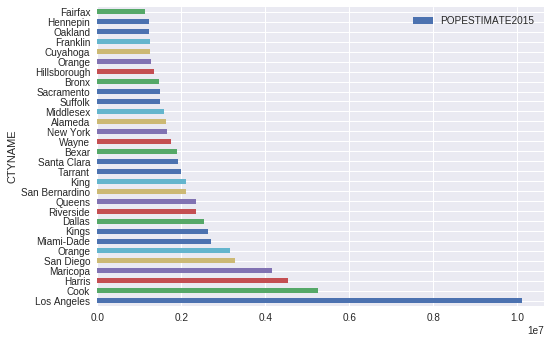

In [0]:
top_30_cities = dataset.nlargest(30, 'POPESTIMATE2015')
top_30_cities.plot.barh(x='CTYNAME', y='POPESTIMATE2015', rot=0)

Plotting the population estimate values in the increasing order grouped by state

The below plot shows that California has the highest population

  

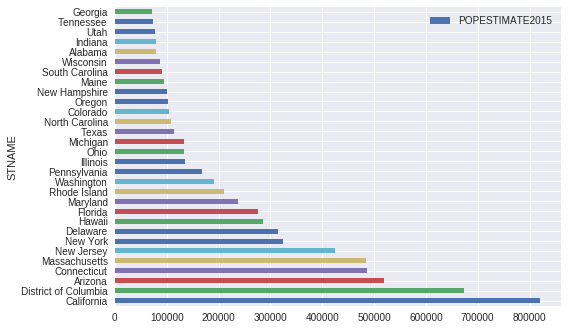

In [0]:
Population_State = dataset[['STNAME', 'POPESTIMATE2015']].groupby(['STNAME'], as_index=False).mean().sort_values(by='POPESTIMATE2015', ascending= True)
top_30_state = Population_State.nlargest(30, 'POPESTIMATE2015')
top_30_state.plot.barh(x='STNAME', y='POPESTIMATE2015', rot=0)

# **Boxplot for Q values**

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


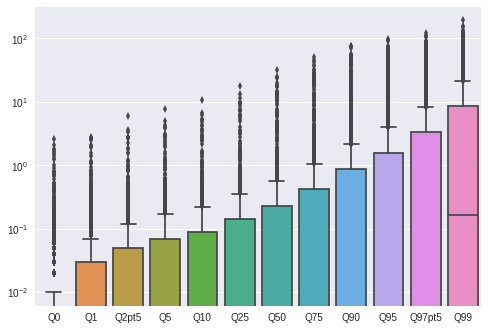

In [0]:
bplot=sns.boxplot(data =dataset.iloc[:,1:13],orient ="v")
bplot.set_yscale('log') #Setting the plot to log scale as visualization of data will be easier

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


Text(0.5, 1.0, 'Boxplot for Q100')

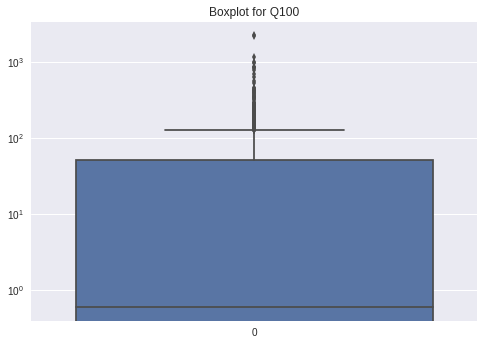

In [0]:
bplot2=sns.boxplot(data=dataset.iloc[:,13],orient="v")
bplot2.set_yscale('log')
plt.title('Boxplot for Q100')

# **Set Random Seed**

In [0]:
np.random.seed(123)

Let us separate the independent variables from the dataset. We are selecting only the columns which start with 'Q' as independent variables. Also, we can see that there are lot of negative values and they are due to  the error in measurements of sensors. So we can impute the negative values with zero.

In [0]:
x=dataset.iloc[:,1:14] #selecting only the desired columns
x[x<0] =0 #Values less than 0 will be replaced with 0

 **Standardized Scaling:**
 
 Standardize features by removing the mean and scaling to unit variance. Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it.

In [0]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x) 
x_scaled=scaler.transform(x)
x_scaled= pd.DataFrame(x_scaled)

**Principal Component Analysis(PCA):**

In our problem, we may prefer to reduce the number of variables, but if we are not sure which variables to remove, then we try to do PCA. So, let us try to reduce the dimensionality by calculating PCA for the scaled values of x

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, svd_solver='full') # assuming i need 10 components
pca.fit(x_scaled)
x_pca=pca.transform(x_scaled)
print(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))

[75.78 88.67 94.66 97.58 98.89 99.39 99.63 99.77 99.86 99.93]


As we can see from above, 10 prinicipal components account for approximately 99.93% of the variance

 We can make a heat-plot(shown below) to see how the features mixed up to create the components.

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


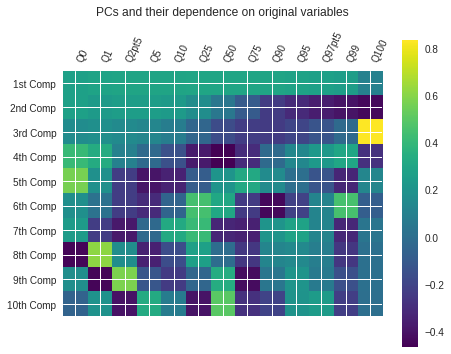

In [0]:
plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3,4,5,6,7,8,9],['1st Comp','2nd Comp','3rd Comp','4th Comp','5th Comp','6th Comp','7th Comp','8th Comp','9th Comp','10th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(list(x.columns.values))),x.columns.values,rotation=65,ha='left')
plt.tight_layout()
plt.title('PCs and their dependence on original variables',y=1.2)
plt.show()

It’s actually difficult to understand how correlated the original features are from the above plot but we can always map the correlation of the features using heat-plot. We can see the correlation between independent variables from the plot below. We can see that most of the independent variables are highly correlated among them.

In [0]:
# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=x,columns=x.columns)

# Compute the correlation matrix
corr = x.corr()


corr.style.background_gradient().set_precision(2)


,Q0,Q1,Q2pt5,Q5,Q10,Q25,Q50,Q75,Q90,Q95,Q97pt5,Q99,Q100
Q0,1,0.97,0.91,0.87,0.86,0.81,0.75,0.71,0.65,0.61,0.58,0.53,0.16
Q1,0.97,1,0.96,0.93,0.92,0.86,0.79,0.75,0.7,0.67,0.63,0.6,0.2
Q2pt5,0.91,0.96,1,0.98,0.97,0.91,0.83,0.77,0.7,0.67,0.63,0.59,0.2
Q5,0.87,0.93,0.98,1,0.99,0.92,0.84,0.78,0.7,0.66,0.62,0.58,0.19
Q10,0.86,0.92,0.97,0.99,1,0.96,0.89,0.82,0.73,0.68,0.63,0.59,0.19
Q25,0.81,0.86,0.91,0.92,0.96,1,0.96,0.89,0.79,0.73,0.68,0.62,0.19
Q50,0.75,0.79,0.83,0.84,0.89,0.96,1,0.96,0.86,0.8,0.74,0.68,0.22
Q75,0.71,0.75,0.77,0.78,0.82,0.89,0.96,1,0.95,0.9,0.85,0.77,0.26
Q90,0.65,0.7,0.7,0.7,0.73,0.79,0.86,0.95,1,0.98,0.95,0.88,0.33
Q95,0.61,0.67,0.67,0.66,0.68,0.73,0.8,0.9,0.98,1,0.99,0.94,0.38


# **Modeling**
Splitting the data into train and test manually without cross validation. 

In [0]:
y = dataset.iloc[:,16]
from sklearn.model_selection import train_test_split
x_train_normal, x_test_normal, y_train_normal, y_test_normal = train_test_split(x_pca, y, test_size = 1/6, random_state = 0)

Let us a create function for MAPE

In [0]:
def mean_absolute_percentage_error(y_test, y_pred): 
    y_test, y_pred = np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# **Linear Model without Cross Validation**

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
regressor_linear=linear_model.LinearRegression() # instantiate linear regression
regressor_linear.fit(x_train_normal, y_train_normal) # fitting linear regressor to training data
y_pred_linear_test1=regressor_linear.predict(x_test_normal) # predicting the test dataset
y_pred_linear_train1 = regressor_linear.predict(x_train_normal) #predicting the train dataset
print('Variance score of linear: %.2f' % r2_score(y_test_normal, y_pred_linear_test1))  
print('Mean Absolute Error for test:', mean_absolute_error(y_test_normal, y_pred_linear_test1))
print('Mean Absolute Error for train:', mean_absolute_error(y_train_normal, y_pred_linear_train1))
print("MAPE for test data: %.2f" % mean_absolute_percentage_error(y_test_normal,y_pred_linear_test1))
print("MAPE for train data: %.2f" % mean_absolute_percentage_error(y_train_normal,y_pred_linear_train1))

Variance score of linear: 0.20
Mean Absolute Error for test: 101746.79367460305
Mean Absolute Error for train: 108838.96029139393
MAPE for test data: 1083.54
MAPE for train data: 642.29


The model performance is considered better when the MAPE and MAE values are smaller. When the predicted values are close to the actual values, then both MAPE and MAE values will be lesser.

# **Random Forest without Cross Validation**

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
regressor_rf=RandomForestRegressor(n_estimators=20, random_state=0) #instatntiate random forest
regressor_rf.fit(x_train_normal, y_train_normal) #fitting random forest to training data
y_pred_rf_test1=regressor_rf.predict(x_test_normal) # predicting the test data
y_pred_rf_train1 = regressor_rf.predict(x_train_normal) #predicting the train data
print('Variance score of randomforest: %.2f' % r2_score(y_test_normal, y_pred_rf_test1))  
print('Mean Absolute Error for test:', mean_absolute_error(y_test_normal, y_pred_rf_test1))
print('Mean Absolute Error for train:', mean_absolute_error(y_train_normal, y_pred_rf_train1))
print("MAPE for test data: %.2f" % mean_absolute_percentage_error(y_test_normal,y_pred_rf_test1))
print("MAPE for train data: %.2f" % mean_absolute_percentage_error(y_train_normal,y_pred_rf_train1))

Variance score of randomforest: 0.26
Mean Absolute Error for test: 100319.79578537875
Mean Absolute Error for train: 81139.45425386047
MAPE for test data: 2850.98
MAPE for train data: 563.54


# **GBM Model without Cross Validation**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
gbrt=GradientBoostingRegressor(n_estimators=200) #instantiate the gbm model
gbrt.fit(x_train_normal, y_train_normal) #fitting the gbm model to training  data
y_pred_gbm=gbrt.predict(x_test_normal) #predicting the test dataset
y_pred_gbm_train = gbrt.predict(x_train_normal) # predicting the train dataset
print('Variance score of gbm: %.2f' % r2_score(y_test_normal, y_pred_gbm))  
print('Mean Squared Error:', mean_squared_error(y_test_normal, y_pred_gbm))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test_normal, y_pred_gbm)))
print('Mean Absolute Error for test:', mean_absolute_error(y_test_normal, y_pred_gbm)) 
print('Mean Absolute Error for train:', mean_absolute_error(y_train_normal, y_pred_gbm_train))
print("MAPE for test data in gbm: %.2f" % mean_absolute_percentage_error(y_test_normal,y_pred_gbm))
print("MAPE for train data in gbm: %.2f" % mean_absolute_percentage_error(y_train_normal,y_pred_gbm_train))

Variance score of gbm: 0.39
Mean Squared Error: 45479215522.51136
Root Mean Squared Error: 213258.56494525925
Mean Absolute Error for test: 90127.39166969336
Mean Absolute Error for train: 74000.53147382912
MAPE for test data in gbm: 1062.06
MAPE for train data in gbm: 581.41


Preparing a dataset for kfold cross validation 

In [0]:
kfold_dataset = pd.DataFrame(x_pca)
print(type(kfold_dataset))
kfold_dataset['POPESTIMATE2015'] = dataset.POPESTIMATE2015

<class 'pandas.core.frame.DataFrame'>


**k fold cross validation:**

In 10 fold cross validation, the dataset is divided into 10 different groups. The first dataset in each group is taken as a validation dataset and the remaining 9 datasets are considered as training datasets. We will fit the model on the training set and evaluate it on the test set. The evaluation score is retained and the model is discarded. Using the sample of model observation scores, the performance of the model is summarized. The below mentioned code is modified from the original code found in:

https://stackoverflow.com/questions/43442072/pandas-how-can-i-do-cross-validation-without-using-scikit

# **Linear Regression Model with Cross Validation**

In [0]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
MAPE_test_value_linear = []
MAPE_train_value_linear = []
MAE_train_value_linear=[]
MAE_test_value_linear=[]
regressor=linear_model.LinearRegression() 
k = 10
fold = np.array_split(kfold_dataset, k)

def cv(regressor, train, test): #creating a function for cross validation
    train_nolabel = train.pop('POPESTIMATE2015').values # remove labels from train data
    test_nolabel = test.pop('POPESTIMATE2015').values # remove variables from test data
    regressor.fit(train,train_nolabel)
    pred_test=regressor.predict(test)
    pred_train=regressor.predict(train)
    MAPE_test_value_linear.append(mean_absolute_percentage_error(test_nolabel, pred_test)) 
    MAE_test_value_linear.append(mean_absolute_error(test_nolabel,pred_test) )
    MAPE_train_value_linear.append(mean_absolute_percentage_error(train_nolabel, pred_train)) 
    MAE_train_value_linear.append(mean_absolute_error(train_nolabel, pred_train))

for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(regressor, train.copy(), test.copy())
    
#calculating the standard deviations for MAPE and MAE of test and train data
MAPE_test_value_linear_final = np.std(MAPE_test_value_linear)
MAPE_train_value_linear_final = np.std(MAPE_train_value_linear)
MAE_test_value_linear_final = np.std(MAE_test_value_linear)
MAE_train_value_linear_final = np.std(MAE_train_value_linear)

print('MAPE value for test(sd):',MAPE_test_value_linear_final)
print('MAPE value for train(sd):',MAPE_train_value_linear_final)
print('MAE value for test(sd):', MAE_test_value_linear_final)
print('MAE value for train(sd):',MAE_train_value_linear_final)

MAPE value for test(sd): 179.33216618700962
MAPE value for train(sd): 44.974289725260746
MAE value for test(sd): 17105.276772101028
MAE value for train(sd): 3969.0797984074015


# **Random Forest Regressor with Cross Validation**

In [0]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAPE_test_value_rf = []
MAPE_train_value_rf = []
MAE_train_value_rf=[]
MAE_test_value_rf=[]

regressor = RandomForestRegressor(n_estimators=200, random_state=0)

k = 10
fold = np.array_split(kfold_dataset, k)

def cv(regressor, train, test): #defining function for cross validation
    train_nolabel = train.pop('POPESTIMATE2015').values 
    test_nolabel = test.pop('POPESTIMATE2015').values
    regressor.fit(train,train_nolabel)
    pred_test=regressor.predict(test)
    pred_train=regressor.predict(train)
    MAPE_test_value_rf.append(mean_absolute_percentage_error(test_nolabel, pred_test)) 
    MAE_test_value_rf.append(mean_absolute_error(test_nolabel,pred_test) )
    MAPE_train_value_rf.append(mean_absolute_percentage_error(train_nolabel, pred_train)) 
    MAE_train_value_rf.append(mean_absolute_error(train_nolabel, pred_train))

for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(regressor, train.copy(), test.copy())
    
#calculating the standard deviations for MAPE and MAE of test and train data
MAPE_test_value_rf_final = np.std(MAPE_test_value_rf)
MAPE_train_value_rf_final = np.std(MAPE_train_value_rf)
MAE_test_value_rf_final = np.std(MAE_test_value_rf)
MAE_train_value_rf_final = np.std(MAE_train_value_rf)

print('MAPE value for test(sd):',MAPE_test_value_rf_final)
print('MAPE value for train(sd):',MAPE_train_value_rf_final)
print('MAE value for test(sd):', MAE_test_value_rf_final)
print('MAE value for train(sd):',MAE_train_value_rf_final)

MAPE value for test(sd): 385.62522745489974
MAPE value for train(sd): 44.86113485190125
MAE value for test(sd): 21666.07621315564
MAE value for train(sd): 3383.3261180308355


# **  Gradient Boosting Model with Cross Validation**

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
MAPE_test_value_gbm = []
MAPE_train_value_gbm = []
MAE_train_value_gbm=[]
MAE_test_value_gbm=[]

regressor=GradientBoostingRegressor(n_estimators=200)

k = 10
fold = np.array_split(kfold_dataset, k)

def cv(regressor, train, test): #defining the function for cross validation
    # remove labels from data
    train_nolabel = train.pop('POPESTIMATE2015').values
    test_nolabel = test.pop('POPESTIMATE2015').values
    regressor.fit(train,train_nolabel)
    pred_test=regressor.predict(test)
    pred_train=regressor.predict(train)
    MAPE_test_value_gbm.append(mean_absolute_percentage_error(test_nolabel, pred_test)) 
    MAE_test_value_gbm.append(mean_absolute_error(test_nolabel,pred_test) )
    MAPE_train_value_gbm.append(mean_absolute_percentage_error(train_nolabel, pred_train)) 
    MAE_train_value_gbm.append(mean_absolute_error(train_nolabel, pred_train))

for i in range(k): 
    train = fold.copy()
    test = fold[i]
    del train[i]
    train = pd.concat(train)
    cv(regressor, train.copy(), test.copy())
    
#calculating the standard deviations for MAPE and MAE of test and train data
MAPE_test_value_gbm_final = np.std(MAPE_test_value_gbm)
MAPE_train_value_gbm_final = np.std(MAPE_train_value_gbm)
MAE_test_value_gbm_final = np.std(MAE_test_value_gbm)
MAE_train_value_gbm_final = np.std(MAE_train_value_gbm)

print('MAPE value for test(sd):',MAPE_test_value_gbm_final)
print('MAPE value for train(sd):',MAPE_train_value_gbm_final)
print('MAE value for test(sd):', MAE_test_value_gbm_final)
print('MAE value for train(sd):',MAE_train_value_gbm_final)

MAPE value for test(sd): 123.11803770323655
MAPE value for train(sd): 25.310302771973088
MAE value for test(sd): 21527.391648980578
MAE value for train(sd): 3172.9118197721937


The variation of MAPE and the variation of MAE values are less for GBM model when compared to linear regression and Random forest regression. So GBM model performs well in our problem setting for this dataset.

# **Table showing MAPE, MAE values for Test and Train data**

In [0]:
Table={'Model_name':['linear','random_forest','GBM'], 'MAPE_TEST(sd)':[MAPE_test_value_linear_final,MAPE_test_value_rf_final,MAPE_test_value_gbm_final],'MAE_TEST(sd)':[MAE_test_value_linear_final,MAE_test_value_rf_final,MAE_test_value_gbm_final],'MAPE_TRAIN(sd)':[MAPE_train_value_linear_final,MAPE_train_value_rf_final,MAPE_train_value_gbm_final],'MAE_TRAIN(sd)':[MAE_train_value_linear_final,MAE_train_value_rf_final,MAE_train_value_gbm_final]}
Table_1 = pd.DataFrame(Table)
print(Table_1)

   MAE_TEST(sd)  MAE_TRAIN(sd)  MAPE_TEST(sd)  MAPE_TRAIN(sd)     Model_name
0  17105.276772    3969.079798     179.332166       44.974290         linear
1  21666.076213    3383.326118     385.625227       44.861135  random_forest
2  21527.391649    3172.911820     123.118038       25.310303            GBM


# **50 Worst Predicted Counties**

I am using the predicted values of gbm model to compare with the true value of population. The 50 worst predicted counties are shown below


In [0]:
y_pred_final = abs(y_pred_gbm-y_test_normal) #calculating absolute difference between true and predicted values
Final_dataset = dataset
Final_dataset['POPESTIMATE_PRED'] = y_pred_final
worst_50 = Final_dataset.nlargest(50, 'POPESTIMATE_PRED')  # finding the 50 highest values and transferring it to worst_50
worst_50_county = pd.DataFrame(worst_50,columns=['CTYNAME','POPESTIMATE_PRED','POPESTIMATE2015'])
worst_50_county

,CTYNAME,POPESTIMATE_PRED,POPESTIMATE2015
1997,Queens,2.240783e+06,2346005
1697,Riverside,2.085303e+06,2352080
2310,Orange,1.074274e+06,3160576
1873,Pinellas,9.116129e+05,949321
1709,Marion,8.350129e+05,940235
2027,Macomb,7.587569e+05,863979
1042,Mecklenburg,7.103595e+05,1034442
1136,Hamilton,7.031829e+05,808405
710,Essex,6.722159e+05,777438
482,Snohomish,6.642219e+05,769444


Text(0, 0.5, 'Actual')

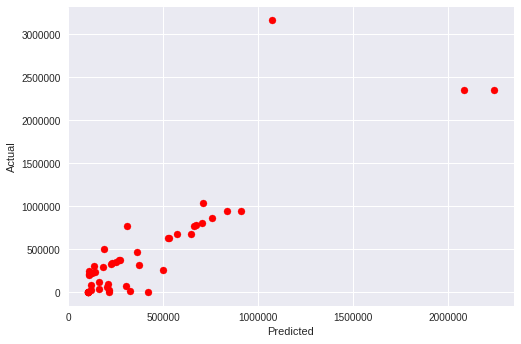

In [0]:
x_plot = worst_50_county['POPESTIMATE_PRED']
y_plot = worst_50_county['POPESTIMATE2015']
plt.scatter(x_plot,y_plot, color='red')
plt.xlabel("Predicted")
plt.ylabel("Actual")

# **MAPE and MAE for CA,TX and FL**

In [0]:
dataset.iloc[:,0:16]
x_state_test= dataset[(dataset.STNAME == 'California') | (dataset.STNAME == 'Texas')  | (dataset.STNAME == 'Florida') ] # creating test dataset only with CA,TX and FL
x_state_train = dataset[(dataset.STNAME != 'California') & (dataset.STNAME != 'Texas')  & (dataset.STNAME != 'Florida')] #creating train dataset without CA,TX and FL
x_train_new = x_state_train.iloc[:,1:13] #Selecting Q variables from the training dataset
y_train_new = x_state_train.iloc[:,16] #Selecting the population estimate from the training dataset
x_test_new  = x_state_test.iloc[:,1:13] #Selecting Q variables from the test dataset
y_test_new  = x_state_test.iloc[:,16] #Selecting the population estimate from the test datatset

We will GBM for prediction as we can see that performance of GBM is higher when compared to other models

In [0]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt1=GradientBoostingRegressor(n_estimators=200) 
gbrt1.fit(x_train_new, y_train_new) 
y_pred_gbm_state=gbrt1.predict(x_test_new)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

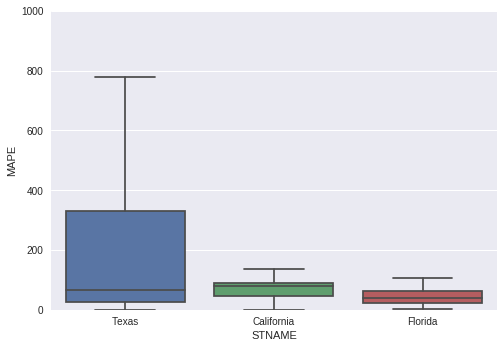

In [0]:
x_state_test['Predicted'] = y_pred_gbm_state
x_state_test['MAPE'] = (abs(x_state_test['POPESTIMATE2015']-x_state_test['Predicted'])/abs(x_state_test['POPESTIMATE2015']))*100 #calculating MAPE value
x_state_test['MAE']=abs(x_state_test['POPESTIMATE2015']-x_state_test['Predicted'])#Calculating MAE value
plt.ylim(0,1000)
sns.set(style="whitegrid")
ax = sns.boxplot(y="MAPE", x="STNAME",showfliers=False, data=x_state_test)

The MAPE values are distributed over a wide range for Texas when compared to California and Florida. Texas has a more number of citynames when compared to florida and California. The actual population spread is higher for Texas when compared to other two states. So when we calculate the percentage value and divide it by the total population, the range of values for Texas tends to go higher. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


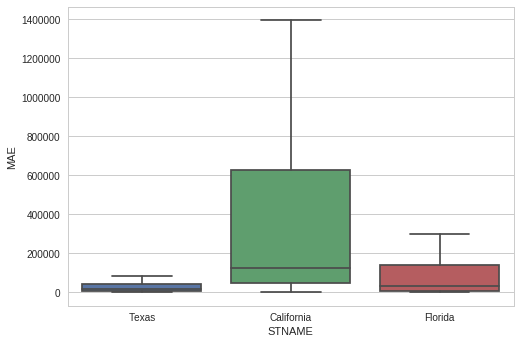

In [0]:
ax = sns.boxplot(y="MAE", x="STNAME",showfliers=False, data=x_state_test)

The MAE values are distributed over a wide range for California when compared to Texas and Florida. California has large number of null records for Q values. So our model is unable to predict the population values for large number of counties accurately. Hence, MAE values are distributed over a large range for Texas when compared to California and Florida 